
# Malware-Detection Deep-Learning-Project


# Project Topic

In this project we want to build a Deep  learning model that is able to predict whether a piece of software is malicious or not.

# Project Goal

The goal of a malware analysis project is to analyze and understand malicious software (malware) to identify its characteristics, behavior, and potential threats it poses. The primary objective is to uncover the inner workings of the malware, detect its presence, and develop countermeasures to protect systems from its harmful effects. Here are some other goals that this project can accomplish

Malware Detection: Develop techniques and tools to detect the presence of malware in various forms, such as files, network traffic, or system memory.

Malware Classification: Classify different types of malware based on their characteristics, behavior, or code patterns. This helps in identifying and categorizing malware samples for further analysis.

Malware Behavior Analysis: Investigate the behavior and capabilities of malware to understand its actions, such as data theft, system modifications, or communication with command-and-control servers.

Malware Reverse Engineering: Reverse engineer malware samples to understand their inner workings, including the code structure, algorithms, and techniques used. This helps in identifying vulnerabilities, developing countermeasures, or extracting indicators of compromise (IOCs).

Threat Intelligence: Gather and analyze data about malware campaigns, attack vectors, and emerging threats. This information can be used to improve detection methods, enhance security practices, and provide timely warnings to protect against new malware strains.

Incident Response and Mitigation: Develop strategies and tools for rapid incident response, containment, and remediation when malware infections occur. This involves identifying the extent of the compromise, removing malware, and restoring affected systems to a secure state.

Security Solutions Development: Putting th emodel in Security products like snort, firewall for easier analysis.

Threat Hunting: Proactively search for signs of malware or indicators of compromise within a network or system environment. This involves using various tools, techniques, and threat intelligence sources to identify and respond to potential malware incidents.

Unsupervised learning techniques can be employed in the process of malware analysis to discover patterns, anomalies, and relationships within the data without relying on labeled examples.

# Dataset:

https://ieee-dataport.org/open-access/malware-analysis-datasets-top-1000-pe-imports

# Github:
https://github.com/mrjaiswa/Unsupervised-Malware

https://github.com/mrjaiswa/Unsupervised-Malware



# Sections:

    Library Imports

    Describing Dataset

    EDA

    Data Visualization

    Deep Learning
        Model 1
        Model 2

    Hyperparamter Tuning

    Supervised Learning
        Logistic Regression
        Random Forest

    Conclusion

    References



# WHY DEEP LEARNING

Using deep learning for malware analysis with 1000 features has several potential advantages compared to supervised learning:

    Ability to Learn Complex Patterns: Deep learning models, such as neural networks, are capable of learning complex patterns and relationships in data. They can automatically extract relevant features from the input data, which can be useful when dealing with high-dimensional feature spaces like in malware analysis with 1000 features.

    End-to-End Learning: Deep learning models can perform end-to-end learning, meaning they can learn directly from the raw input data without relying on handcrafted feature engineering. This can save time and effort in the feature engineering process, especially when dealing with large and diverse datasets.

    Representation Learning: Deep learning models have the capability to learn meaningful representations of the data. They can learn hierarchical representations of features, capturing both low-level and high-level patterns. This can be advantageous in malware analysis, as it allows the model to uncover hidden patterns and detect subtle variations in malicious behavior.

    Generalization: Deep learning models have the potential to generalize well to unseen data. They can learn from a large amount of training data and capture the underlying distribution of the data, which can help in detecting new and previously unseen malware variants.

    Adaptability: Deep learning models can adapt and update their learned representations as new data becomes available. This is particularly useful in malware analysis, where new malware samples are constantly emerging. Deep learning models can be continuously trained on new data to improve their performance and adapt to evolving threats.

However, it's important to note that deep learning also has some potential challenges and considerations:

    Data Requirements: Deep learning models typically require a large amount of labeled training data to achieve good performance. Acquiring and labeling such data can be challenging and time-consuming, especially in the context of malware analysis where labeled samples may be limited.

    Computationally Intensive: Training deep learning models can be computationally intensive, especially for complex architectures and large datasets. It often requires specialized hardware, such as GPUs or TPUs, to accelerate the training process.

    Black Box Nature: Deep learning models are often considered as black boxes, meaning their internal workings and decision-making process can be difficult to interpret and explain. This lack of interpretability can be a concern in certain domains, such as malware analysis, where interpretability and explainability are important.

    Overfitting: Deep learning models can be prone to overfitting, especially when the training data is limited. Overfitting occurs when the model becomes too specialized to the training data and performs poorly on unseen data. Regularization techniques and careful model validation are necessary to mitigate overfitting.

In contrast, supervised learning approaches for malware analysis with handcrafted features may offer better interpretability and control over the feature engineering process. They may also require less computational resources and training data compared to deep learning. However, they may struggle to capture complex patterns and variations in the data that deep learning models can potentially capture. Ultimately, the choice between deep learning and supervised learning depends on the specific requirements, available resources, and characteristics of the dataset in the context of malware analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import scipy.stats as st
import math
from scipy.stats import norm, skew
from collections import Counter
%matplotlib inline


In [2]:
data= pd.read_csv('/kaggle/input/malware-analysis-datasets-top1000-pe-imports/top_1000_pe_imports.csv')


In [3]:
data.head()



,hash,GetProcAddress,ExitProcess,WriteFile,GetLastError,CloseHandle,FreeLibrary,Sleep,GetStdHandle,MultiByteToWideChar,...,bind,RegEnumKeyExA,WinHttpOpen,_controlfp,WinExec,GetSecurityDescriptorDacl,FindFirstFreeAce,GetTimeFormatW,LookupAccountSidW,malware
0,071e8c3f8922e186e57548cd4c703a5d,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,33f8e6d08a6aae939f25a8e0d63dd523,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
2,b68abd064e975e1c6d5f25e748663076,1,1,1,1,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
3,72049be7bd30ea61297ea624ae198067,1,1,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,c9b3700a77facf29172f32df6bc77f48,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [15]:
data.shape

(47580, 1002)

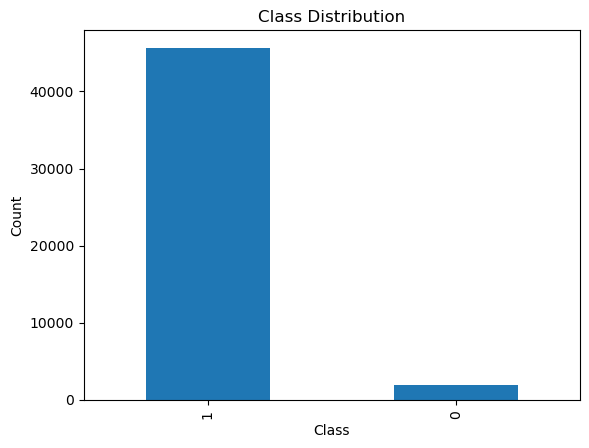

Class Proportions:
1    95.945776
0     4.054224
Name: malware, dtype: float64
Class imbalance detected. Consider oversampling techniques.


In [4]:
class_counts = data['malware'].value_counts()

# Visualize class distribution
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

# Calculate class proportions
class_proportions = class_counts / len(data) * 100

print("Class Proportions:")
print(class_proportions)

# Check for class imbalance
if class_proportions.min() < 5 or class_proportions.max() > 95:
    print("Class imbalance detected. Consider oversampling techniques.")
else:
    print("Class distribution is balanced.")


**Correlation Matrix**

A correlation matrix is a table that displays the correlation coefficients between multiple variables. It is commonly used in data analysis and helps to understand the relationships and dependencies between variables in a dataset. In the context of a correlation matrix, colinearity refers to a high degree of correlation between two or more variables. When two variables are highly correlated, it indicates that they are linearly related, and changes in one variable are associated with predictable changes in the other variable. Colinearity can be detected by observing the correlation coefficients in the correlation matrix.

Identify relationships

Variable selection

Detect patterns and dependencies

Multivariate analysis

Data preprocessing

Outlier detection

Visual representation

While a high correlation between two variables suggests a relationship, it does not necessarily imply a cause-and-effect relationship. correlation matrices are valuable tools for exploratory data analysis, variable selection, and understanding the relationships between variables in a dataset. They provide a concise summary of the data and serve as a starting point for further analysis and decision-making. Colinearity in a correlation matrix can have both pros and cons:

Pros:

Identification of Relationships: Correlated variables can provide insights into the relationships and associations between different variables in a dataset. They can indicate potential cause-and-effect relationships or common underlying factors.

Feature Selection: Correlated variables can help in feature selection by identifying redundant variables. If two variables are highly correlated, keeping both of them in a predictive model might not add much additional information. Removing one of the correlated variables can simplify the model and improve interpretability.

Cons:

Multicollinearity: High correlation or colinearity among predictor variables in a predictive model can lead to multicollinearity. Multicollinearity can make it difficult to interpret the individual effects of predictor variables and can impact the stability and reliability of the model's coefficients or feature importance estimates.

Overfitting: In some cases, including highly correlated variables in a predictive model can lead to overfitting. Overfitting occurs when a model performs well on the training data but fails to generalize well to new, unseen data. Including correlated variables may increase the complexity of the model and make it overly sensitive to the training data, leading to poor generalization.



                GetProcAddress   type_0   type_1
GetProcAddress         1.00000 -0.03018  0.03018
type_0                -0.03018  1.00000 -1.00000
type_1                 0.03018 -1.00000  1.00000


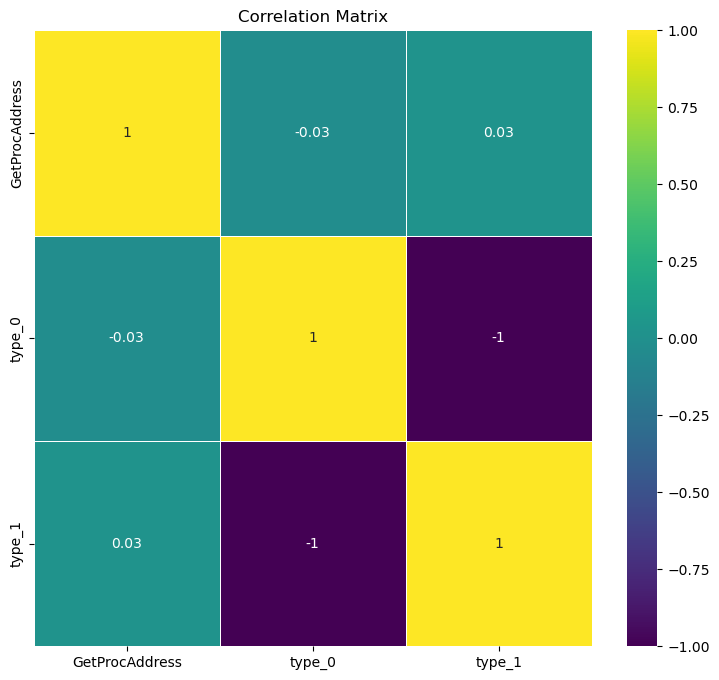

In [7]:


url_column = data['GetProcAddress']
type_encoded_column = data['malware']

# Perform one-hot encoding on 'type_encoded'
encoded_type = pd.get_dummies(type_encoded_column, prefix='type')

# Concatenate 'url' and encoded 'type_encoded'
combined_data = pd.concat([url_column, encoded_type], axis=1)

# Calculate the correlation matrix
correlation_matrix = combined_data.corr()
print(correlation_matrix)
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(9, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



In [8]:
correlation_matrix = data.corr()

# Print the correlation matrix
print(correlation_matrix)

/tmp/ipykernel_32/164012151.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


                           GetProcAddress  ExitProcess  WriteFile  \
GetProcAddress                   1.000000     0.847768   0.649377   
ExitProcess                      0.847768     1.000000   0.701816   
WriteFile                        0.649377     0.701816   1.000000   
GetLastError                     0.637042     0.647128   0.913926   
CloseHandle                      0.636808     0.657660   0.923477   
...                                   ...          ...        ...   
GetSecurityDescriptorDacl        0.056162     0.049415   0.079830   
FindFirstFreeAce                 0.058566     0.064937   0.086797   
GetTimeFormatW                   0.049229     0.045529   0.076093   
LookupAccountSidW                0.054231     0.051204   0.077820   
malware                          0.030180     0.123767   0.109550   

                           GetLastError  CloseHandle  FreeLibrary     Sleep  \
GetProcAddress                 0.637042     0.636808     0.546054  0.482573   
ExitProcess  

In [4]:


from sklearn.model_selection import train_test_split
X = data.drop(['hash','malware'], axis=1)
y = data['malware']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)



In [17]:
X_train.shape

(33306, 1000)

In [18]:
y_train.shape

(33306,)

In [11]:
from sklearn.feature_selection import SelectKBest, chi2

# Assuming X contains your 1000 feature columns and y contains the target variable
# Select the top k features based on chi-square test
selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Create a new DataFrame with only the selected features
X_selected = X.iloc[:, selected_feature_indices]

In [12]:
X_selected

,__set_app_type,exit,__p__fmode,_initterm,__setusermatherr,_exit,free,_cexit,_XcptFilter,__p__commode
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
47575,0,0,0,0,0,0,0,0,0,0
47576,0,0,0,0,0,0,0,0,0,0
47577,0,0,0,0,0,0,0,0,0,0
47578,0,0,0,0,0,0,0,0,0,0


In [13]:
correlation_matrix = X_selected.corr()

# Print the correlation matrix
print(correlation_matrix)

                  __set_app_type      exit  __p__fmode  _initterm  \
__set_app_type          1.000000  0.910915    0.923638   0.875597   
exit                    0.910915  1.000000    0.824611   0.921248   
__p__fmode              0.923638  0.824611    1.000000   0.799014   
_initterm               0.875597  0.921248    0.799014   1.000000   
__setusermatherr        0.877720  0.919673    0.801421   0.996230   
_exit                   0.851958  0.895602    0.819453   0.940144   
free                    0.758957  0.689834    0.668288   0.632675   
_cexit                  0.809451  0.719684    0.711631   0.668874   
_XcptFilter             0.827115  0.852191    0.848699   0.899539   
__p__commode            0.797066  0.838876    0.863102   0.908711   

                  __setusermatherr     _exit      free    _cexit  _XcptFilter  \
__set_app_type            0.877720  0.851958  0.758957  0.809451     0.827115   
exit                      0.919673  0.895602  0.689834  0.719684     0.852191 

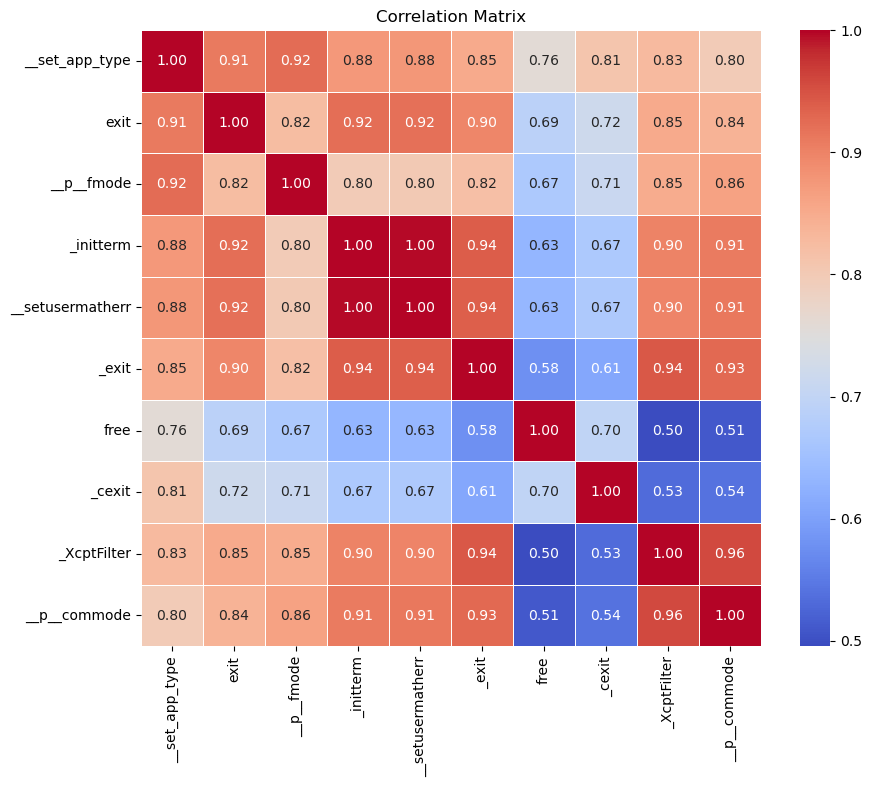

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

PCA (Principal Component Analysis) is a dimensionality reduction technique that is commonly used to simplify and visualize high-dimensional data. It aims to transform a set of correlated variables into a new set of uncorrelated variables called principal components.

The main idea behind PCA is to find the directions (principal components) in the data along which the variance is maximized. These principal components are ordered by the amount of variance they explain, with the first component explaining the most variance, followed by the second component, and so on. By retaining only a subset of the principal components that capture most of the variance, we can reduce the dimensionality of the data while still retaining important information.

The steps involved in PCA are as follows:

    Standardization: It is often necessary to standardize the data before applying PCA. This involves scaling the variables to have zero mean and unit variance, which ensures that all variables are on a similar scale.

    Covariance Matrix: Compute the covariance matrix of the standardized data. The covariance matrix measures the relationships between pairs of variables and provides insights into the patterns of variability in the data.

    Eigendecomposition: Perform an eigendecomposition of the covariance matrix to obtain the eigenvalues and eigenvectors. The eigenvalues represent the amount of variance explained by each principal component, while the eigenvectors represent the direction of each principal component.

    Principal Components Selection: Select a subset of the principal components based on the explained variance. Typically, a threshold (e.g., 90% variance explained) is set to determine the number of components to retain.

    Projection: Project the original data onto the selected principal components to obtain the reduced-dimensional representation of the data.

PCA offers several benefits:

    Dimensionality Reduction: PCA allows for reducing the dimensionality of the data by selecting a smaller number of principal components that explain most of the variance. This can be useful when dealing with high-dimensional datasets and can help overcome the curse of dimensionality.

    Feature Interpretation: PCA provides a new set of variables (principal components) that are linear combinations of the original variables. These components may have a more interpretable meaning, allowing for a deeper understanding of the data.

    Noise Reduction: By focusing on the principal components that capture the most variance, PCA can effectively filter out noise and irrelevant features, improving the signal-to-noise ratio.

    Visualization: PCA enables visualizing high-dimensional data in a lower-dimensional space (e.g., 2D or 3D) while preserving as much of the original variance as possible. This facilitates the exploration and interpretation of data patterns.

However, it's important to note that PCA also has limitations:

    Loss of Information: PCA reduces the dimensionality by discarding some of the less important components. This leads to a loss of information, and the retained components may not fully represent the intricacies of the original data.

    Linearity Assumption: PCA assumes a linear relationship between variables, which may not always hold in real-world datasets. In cases where the relationships are nonlinear, other dimensionality reduction techniques such as manifold learning may be more appropriate.

    Interpretability Challenges: While PCA provides a compact representation of the data, the interpretation of the principal components may not always be straightforward. The components are linear combinations of the original variables and may not have direct physical or semantic meaning.

    Sensitive to Outliers: PCA can be sensitive to outliers since it focuses on maximizing variance. Outliers can disproportionately affect the calculation of principal components and distort the results.

In summary, PCA is a powerful technique for dimensionality reduction and data exploration. It can be particularly useful in scenarios with high-dimensional data or when visualizing patterns in data. However

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)  # Reduce to 10 dimensions (adjust as needed)
X_train_pca = pca.fit_transform(X)
X_test_pca = pca.transform(X)



In [8]:
X_train_pca



array([[ 1.05999016e+01, -7.29481704e+00, -8.28265523e+00, ...,
        -2.13943975e-02,  3.85752592e-03,  9.00356201e-03],
       [ 4.03024557e-01,  7.12528384e+00, -1.51874986e+00, ...,
        -1.31289660e+00,  1.92973362e+00, -6.20025441e-01],
       [-4.72224368e+00, -3.39261369e+00,  5.87613526e-01, ...,
        -5.14237358e-01, -1.88092685e-01, -1.96680005e-01],
       ...,
       [ 3.15166796e-01,  9.75587699e+00, -2.66907108e+00, ...,
         1.05860835e-02, -1.51492433e-02, -2.58052967e-03],
       [ 1.05999016e+01, -7.29481704e+00, -8.28265523e+00, ...,
        -2.13943975e-02,  3.85752592e-03,  9.00356201e-03],
       [-4.58568938e+00, -2.66675596e+00,  1.68242833e+00, ...,
         6.01376030e-02, -8.20590367e-01, -6.89835560e-01]])

In [9]:
X_test_pca

array([[ 1.05999016e+01, -7.29481704e+00, -8.28265523e+00, ...,
        -2.16865690e-02,  3.66439888e-03,  8.93205488e-03],
       [ 4.03024557e-01,  7.12528384e+00, -1.51874986e+00, ...,
        -1.30428793e+00,  1.93487123e+00, -6.11647227e-01],
       [-4.72224368e+00, -3.39261369e+00,  5.87613526e-01, ...,
        -4.96628386e-01, -1.70685351e-01, -1.78905226e-01],
       ...,
       [ 3.15166796e-01,  9.75587699e+00, -2.66907108e+00, ...,
         1.06679565e-02, -1.50287949e-02, -2.63404538e-03],
       [ 1.05999016e+01, -7.29481704e+00, -8.28265523e+00, ...,
        -2.16865690e-02,  3.66439888e-03,  8.93205488e-03],
       [-4.58568938e+00, -2.66675596e+00,  1.68242833e+00, ...,
         5.70122244e-02, -8.18566339e-01, -6.81094586e-01]])

In [19]:
X = data.drop(['hash', 'malware'], axis=1)
y = data['malware']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Create the model
model1 = Sequential()
model1.add(Dense(64, activation='relu', input_dim=1000))  # Update input_dim to match the number of features
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))  # Assuming binary classification task

# Compile and train the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1041/1041 [==============================] - 4s 3ms/step - loss: 0.0971 - accuracy: 0.9695
Epoch 2/10
1041/1041 [==============================] - 3s 3ms/step - loss: 0.0594 - accuracy: 0.9770
Epoch 3/10
1041/1041 [==============================] - 3s 3ms/step - loss: 0.0502 - accuracy: 0.9811
Epoch 4/10
1041/1041 [==============================] - 3s 3ms/step - loss: 0.0446 - accuracy: 0.9829
Epoch 5/10
1041/1041 [==============================] - 3s 3ms/step - loss: 0.0414 - accuracy: 0.9838
Epoch 6/10
1041/1041 [==============================] - 3s 3ms/step - loss: 0.0379 - accuracy: 0.9854
Epoch 7/10
1041/1041 [==============================] - 3s 3ms/step - loss: 0.0349 - accuracy: 0.9865
Epoch 8/10
1041/1041 [==============================] - 3s 3ms/step - loss: 0.0341 - accuracy: 0.9865
Epoch 9/10
1041/1041 [==============================] - 3s 3ms/step - loss: 0.0320 - accuracy: 0.9870
Epoch 10/10
1041/1041 [==============================] - 3s 3ms/step - loss: 0.032

In [20]:
test_loss1, test_accuracy1 = model1.evaluate(X_test, y_test)
print("Model 1 - Test Loss:", test_loss1)
print("Model 1 - Test Accuracy:", test_accuracy1)

447/447 [==============================] - 1s 2ms/step - loss: 0.0604 - accuracy: 0.9809
Model 1 - Test Loss: 0.060385607182979584
Model 1 - Test Accuracy: 0.9809443950653076


In [21]:
model2 = Sequential()
model2.add(Dense(128, activation='relu', input_dim=1000))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))  # Assuming binary classification task

# Compile and train the second model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1041/1041 [==============================] - 5s 4ms/step - loss: 0.0854 - accuracy: 0.9719
Epoch 2/10
1041/1041 [==============================] - 4s 4ms/step - loss: 0.0589 - accuracy: 0.9778
Epoch 3/10
1041/1041 [==============================] - 4s 4ms/step - loss: 0.0489 - accuracy: 0.9814
Epoch 4/10
1041/1041 [==============================] - 4s 4ms/step - loss: 0.0437 - accuracy: 0.9835
Epoch 5/10
1041/1041 [==============================] - 4s 4ms/step - loss: 0.0404 - accuracy: 0.9848
Epoch 6/10
1041/1041 [==============================] - 4s 4ms/step - loss: 0.0376 - accuracy: 0.9857
Epoch 7/10
1041/1041 [==============================] - 4s 4ms/step - loss: 0.0351 - accuracy: 0.9864
Epoch 8/10
1041/1041 [==============================] - 4s 4ms/step - loss: 0.0334 - accuracy: 0.9868
Epoch 9/10
1041/1041 [==============================] - 4s 4ms/step - loss: 0.0342 - accuracy: 0.9871
Epoch 10/10
1041/1041 [==============================] - 4s 4ms/step - loss: 0.033

In [22]:
test_loss2, test_accuracy2 = model2.evaluate(X_test, y_test)
print("Model 2 - Test Loss:", test_loss2)
print("Model 2 - Test Accuracy:", test_accuracy2)

447/447 [==============================] - 1s 2ms/step - loss: 0.0629 - accuracy: 0.9814
Model 2 - Test Loss: 0.0628662183880806
Model 2 - Test Accuracy: 0.9814347624778748


In [23]:
pca = PCA(n_components=30)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create the second model
model2 = Sequential()
model2.add(Dense(128, activation='relu', input_dim=30))  # Adjust input_dim to match the number of PCA components
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))  # Assuming binary classification task

# Compile and train the second model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(X_train_pca, y_train, epochs=10, batch_size=32)

Epoch 1/10
1041/1041 [==============================] - 3s 2ms/step - loss: 0.0910 - accuracy: 0.9697
Epoch 2/10
1041/1041 [==============================] - 2s 2ms/step - loss: 0.0729 - accuracy: 0.9738
Epoch 3/10
1041/1041 [==============================] - 2s 2ms/step - loss: 0.0684 - accuracy: 0.9753
Epoch 4/10
1041/1041 [==============================] - 2s 2ms/step - loss: 0.0653 - accuracy: 0.9763
Epoch 5/10
1041/1041 [==============================] - 2s 2ms/step - loss: 0.0637 - accuracy: 0.9767
Epoch 6/10
1041/1041 [==============================] - 2s 2ms/step - loss: 0.0620 - accuracy: 0.9766
Epoch 7/10
1041/1041 [==============================] - 2s 2ms/step - loss: 0.0593 - accuracy: 0.9781
Epoch 8/10
1041/1041 [==============================] - 2s 2ms/step - loss: 0.0581 - accuracy: 0.9781
Epoch 9/10
1041/1041 [==============================] - 2s 2ms/step - loss: 0.0571 - accuracy: 0.9784
Epoch 10/10
1041/1041 [==============================] - 2s 2ms/step - loss: 0.055

In [25]:
loss, accuracy = model2.evaluate(X_test_pca, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

447/447 [==============================] - 1s 2ms/step - loss: 0.0618 - accuracy: 0.9785
Test Loss: 0.06175684928894043
Test Accuracy: 0.9784923791885376


# Logistic Regression

For this classification task we will focus on logistic regression and tree-based models since they are very flexible yet still provide good explainability. We will try out different models, inspect how they perform on our dataset and compare them to each other. The models we will use are:

Logistic Regression

Some pros:

     Logistic regression provides interpretable results. The coefficients of the model can be interpreted as the impact of each feature on the predicted probability of the positive class. This makes it easier to understand and explain the relationship between the input variables and the target variable.

    Logistic regression is computationally efficient and can handle large datasets with many features. It is less prone to overfitting compared to more complex models, such as neural networks, which can be advantageous when dealing with limited data.

    Logistic regression does not assume a specific distribution for the input features. It can handle both categorical and continuous variables, making it versatile for a wide range of data types.

    Logistic regression can handle multicollinearity (high correlation between predictors) reasonably well. While high multicollinearity can affect the stability of the coefficients, logistic regression can still provide meaningful results.

    Logistic regression can be regularized to prevent overfitting. Techniques like L1 or L2 regularization can be applied to penalize large coefficient values and improve generalization performance.






In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9773714445845594


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Trying PCA

In [28]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_pca, y_train)
y_pred = logistic_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9690346083788707


# Confusion Matrix using Deep-Learning

447/447 [==============================] - 1s 2ms/step


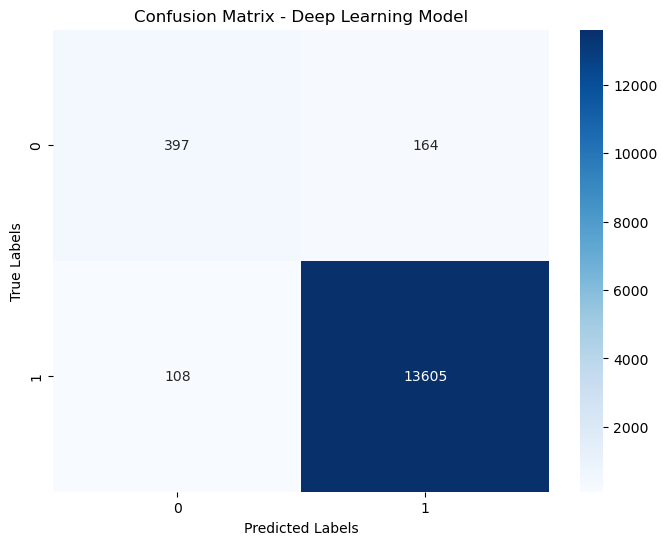

Accuracy - Deep Learning Model: 0.9809443743869973


In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred_probs = model1.predict(X_test)
y_pred_dl = (y_pred_probs > 0.5).astype(int)

# Create a confusion matrix
cm_dl = confusion_matrix(y_test, y_pred_dl)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dl, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Deep Learning Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Calculate accuracy
accuracy_dl = accuracy_score(y_test, y_pred_dl)
print("Accuracy - Deep Learning Model:", accuracy_dl)

# Confusion Matrix using Supervised-Learning

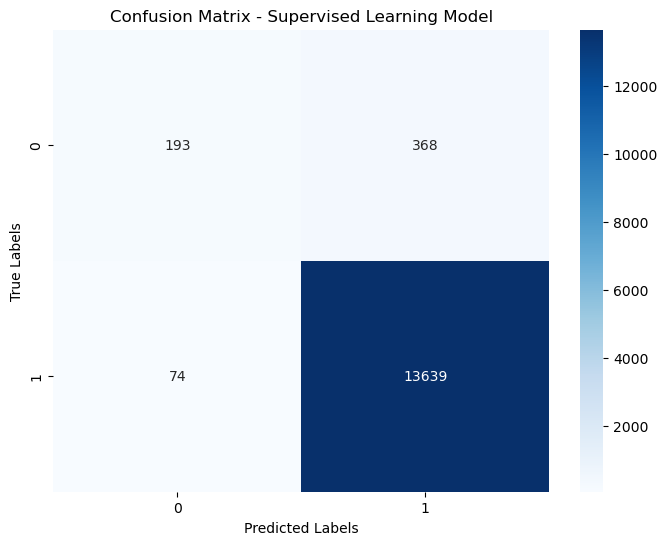

Accuracy - Supervised Learning Model: 0.9690346083788707


In [32]:
y_pred_sl = logistic_model.predict(X_test_pca)

# Create a confusion matrix
cm_sl = confusion_matrix(y_test, y_pred_sl)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_sl, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Supervised Learning Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Calculate accuracy
accuracy_sl = accuracy_score(y_test, y_pred_sl)
print("Accuracy - Supervised Learning Model:", accuracy_sl)


Conclusion

As a final step in this project let's talk about what did work out well and where things could be improved.
Learnings and Takeaways

Dataset Preparation: We prepared our dataset by organizing the malware samples into a structured format, where each sample was > 1000 features. Here we saw that sometimes reducing the dimensioanlity may backfire too. As we saw our model's accuracy was affected.

Model Architecture: We designed a deep learning model using a sequential architecture. The model consisted of multiple layers, including dense layers with activation functions like ReLU and a final output layer with a sigmoid activation function for binary classification.

Model Training: We compiled the model with the Adam optimizer and used binary cross-entropy as the loss function. We trained the model on the training dataset for a specified number of epochs and a batch size of 32.

Model Evaluation: After training, we evaluated the model's performance on a separate test dataset. 

Results: The evaluation results provided insights into the effectiveness of the deep learning model for malware analysis. The test loss value indicated the model's ability to minimize errors, while the test accuracy represented the percentage of correctly classified malware samples.

Deep vs Supervised: We saw that here Deep learning performed exceptionally well.

From this we learned if we have proper datset, we can train the machines to recognize any pattern and employ it to recognize patterns. Here using my model we can use it devices like:

    Firewall
    IPS/IDS
    EMail Scanning devices

What did not work


I never got the opportunity of exporting my model to my machine and then try to pass it through the model and see how well it did.

Possible Improvements

If I had more features like apihooks and some other parameters in the data like number of bytes transferred or PE info then the model might be more effective.
Also I would want to try some more deep and supervised learning on this to see if that improves the model.


References

    https://towardsdatascience.com/clustering-out-of-the-black-box-5e8285220717

    https://towardsdatascience.com/gaussian-mixture-modelling-gmm-833c88587c7f

    https://www.cs.cmu.edu/~guestrin/Class/10701-S07/Slides/clustering.pdf

    https://www.linkedin.com/pulse/pe-malware-static-analysis-ala-a-amarin/

